In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.stats import mode
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
%matplotlib inline
import datetime
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sb  
sb.set_style('darkgrid')

In [7]:
daily_data = pd.read_csv('../exchangeratedata/daily_rates.csv', skiprows=3, header=0)
daily_data['datetime'] = pd.to_datetime(daily_data['DATE'])
daily_data['dayofweek'] = daily_data['datetime'].apply(lambda row: row.dayofweek)
weekly_data = daily_data[daily_data['dayofweek'] == 4]
UK_US = pd.DataFrame()
UK_US['UK_US']=weekly_data['XUDLUSS']
UK_US = UK_US.set_index(weekly_data['datetime'].values)

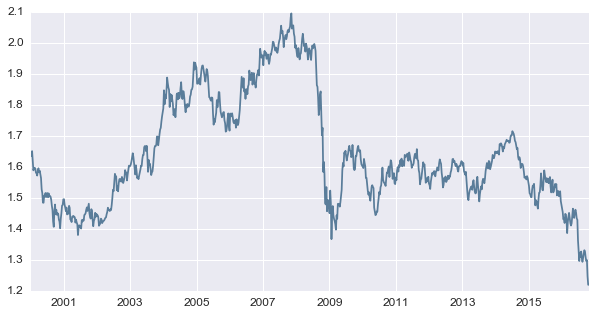

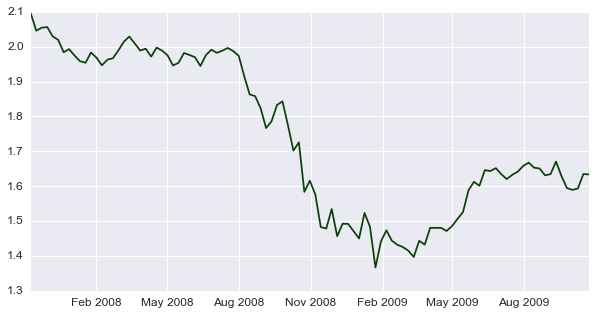

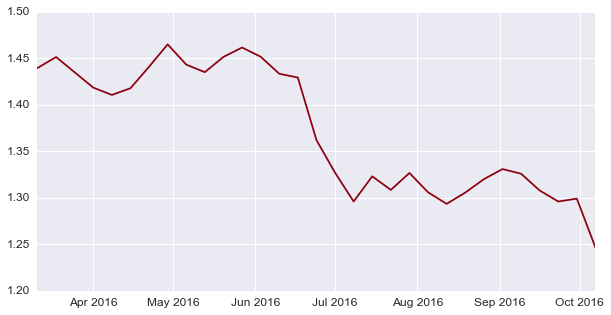

In [109]:
plt.figure(figsize=(10, 5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(UK_US['UK_US'], color=sb.xkcd_rgb["steel blue"])
plt.savefig('../docs/img/full_exchange', dpi=100)

plt.figure(figsize=(10, 5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(UK_US[['UK_US']].iloc[400:500, :], color=sb.xkcd_rgb["hunter green"]) 
plt.savefig('../docs/img/fincrisis', dpi=100)

plt.figure(figsize=(10, 5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.plot(UK_US[['UK_US']].iloc[820:850, :], color=sb.xkcd_rgb["crimson"]) 
plt.savefig('../docs/img/brexit', dpi=100)



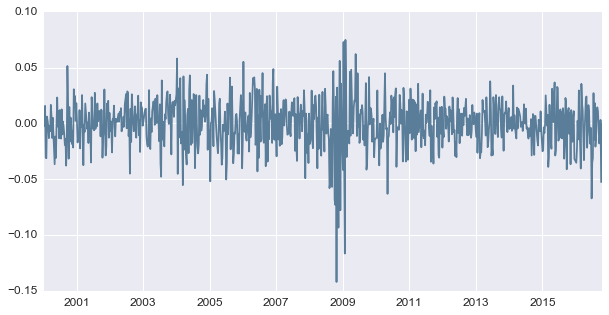

In [110]:
UK_US['first_diff_uk_us'] = UK_US['UK_US'] - UK_US['UK_US'].shift()  
plt.figure(figsize=(10, 5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.plot(UK_US['first_diff_uk_us'], color=sb.xkcd_rgb["steel blue"])
plt.savefig('../docs/img/firstdiff', dpi=100)

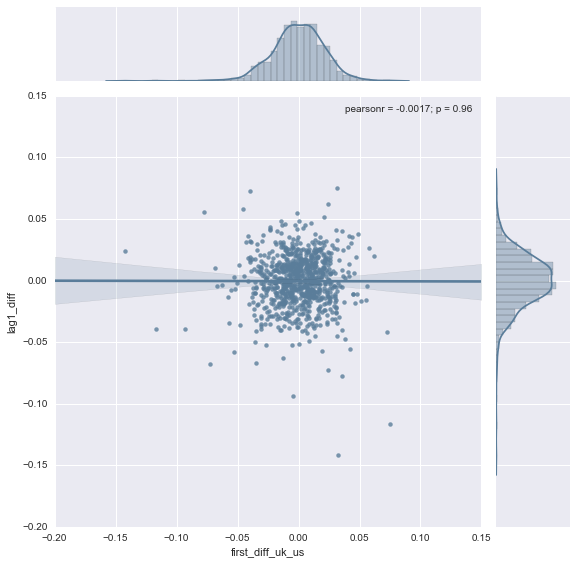

In [112]:
UK_US['lag1_diff']=UK_US['first_diff_uk_us'].shift()
_ = sb.jointplot('first_diff_uk_us', 'lag1_diff', UK_US, kind='reg', size=8, 
             color=sb.xkcd_rgb["steel blue"])
plt.savefig('../docs/img/joint', dpi=100)



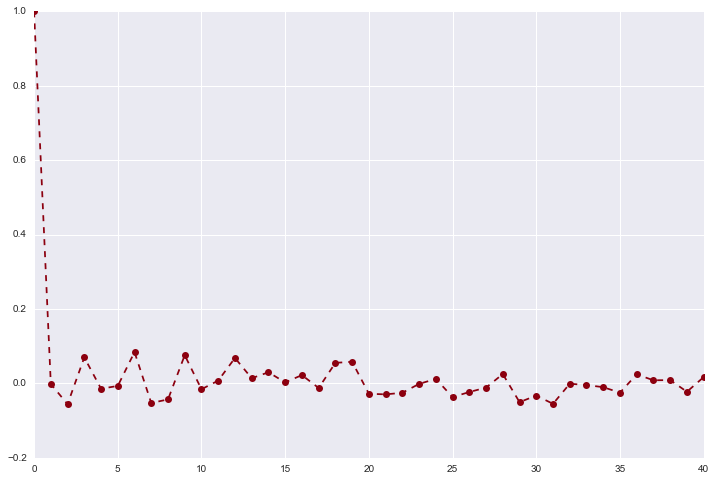

In [113]:
lag_correlations_UK_US = acf(UK_US['first_diff_uk_us'].iloc[1:])  
fig, ax = plt.subplots(figsize=(12,8))  
_ = ax.plot(lag_correlations_UK_US, marker='o', linestyle='--', color=sb.xkcd_rgb["crimson"])
plt.savefig('../docs/img/autocorrelation', dpi=100)